In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt 

from create_sequence_w_labels import hmmgenerate
from initial_guess import get_initial_values

from baum_welch import fit as bw_fit
from cml_incomplete_normalized import fit as cml_fit

In [3]:
K = 2          # num of states
L = 2          # num of observations
T = 1024       # num of sequences
N = 64         # Length of each sequence
noise = 0.2    # Noise
epoch = 15     # Epoch for cml  

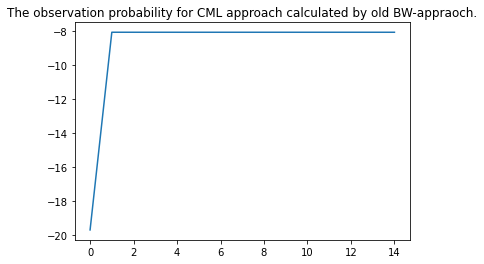

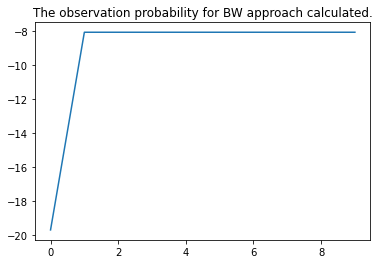

The CML approach gives 0.9992619743952763 times better probability estimation than what BW approach does.


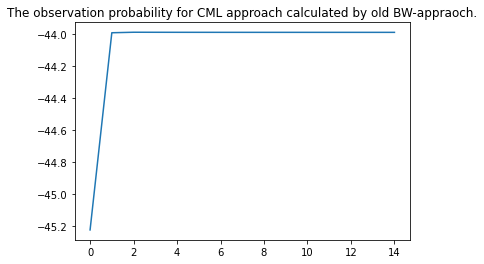

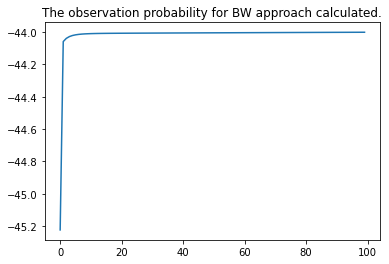

The CML approach gives 1.0139457498235525 times better probability estimation than what BW approach does.


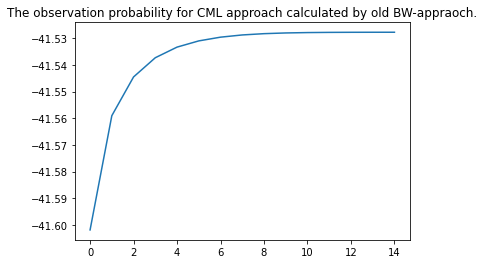

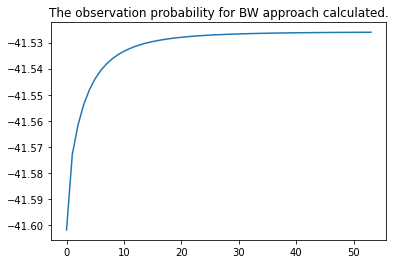

The CML approach gives 0.9982497479724407 times better probability estimation than what BW approach does.


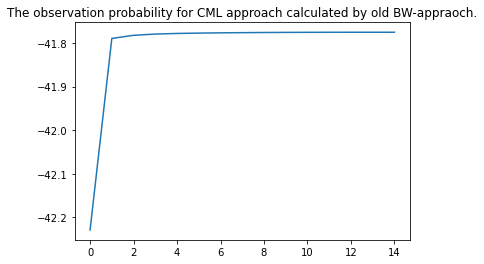

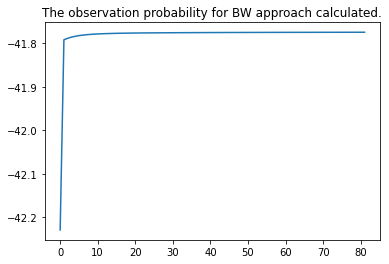

The CML approach gives 0.9994789168214094 times better probability estimation than what BW approach does.


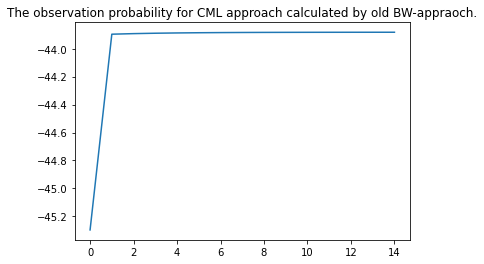

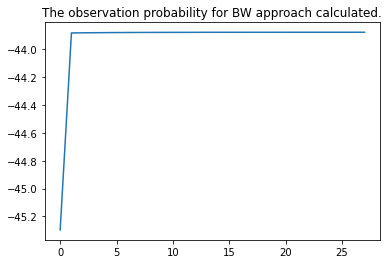

The CML approach gives 0.99612028956173 times better probability estimation than what BW approach does.


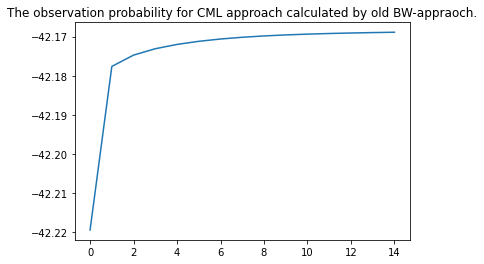

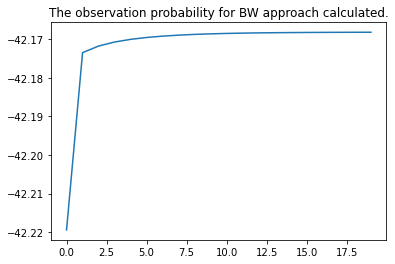

The CML approach gives 0.999335216866484 times better probability estimation than what BW approach does.


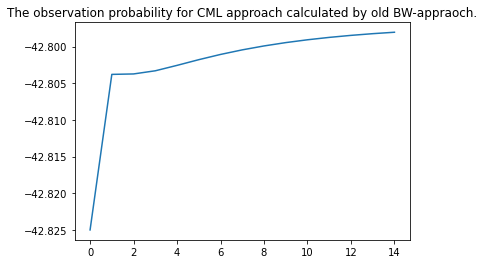

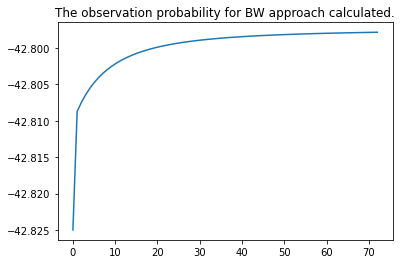

The CML approach gives 0.9998159771163075 times better probability estimation than what BW approach does.


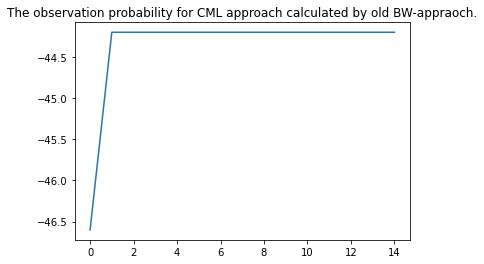

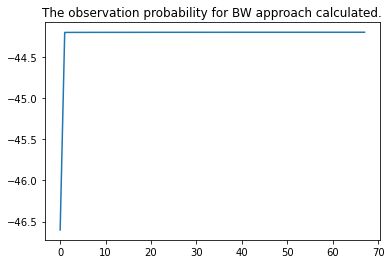

The CML approach gives 1.0008929959982718 times better probability estimation than what BW approach does.


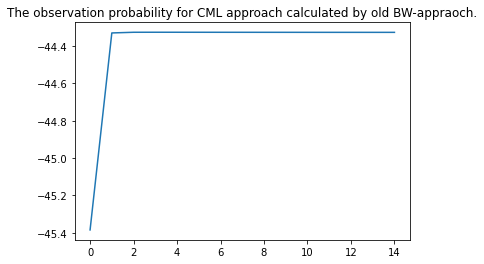

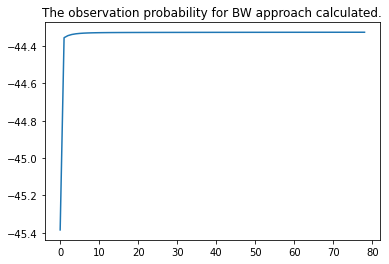

The CML approach gives 0.999532783625637 times better probability estimation than what BW approach does.


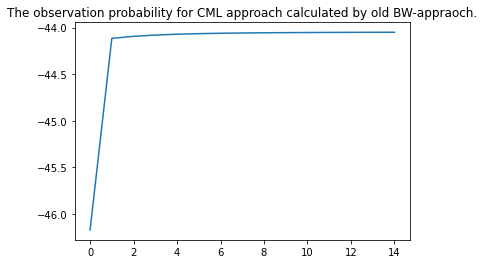

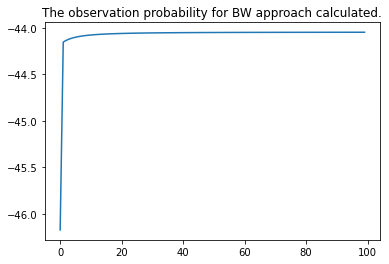

The CML approach gives 0.9970044284362417 times better probability estimation than what BW approach does.


In [5]:
for i in range(10):
    A_gt, B_gt, pi_gt, P_gt, observations, states, labels = hmmgenerate(K, L, T, N, S=0, D=0, edhmm = False, complete=False)
    A_init, B_init, pi_init, P_init = get_initial_values(A_gt, B_gt, noise, P_gt, have_P = True)
    
    A, B, P, pi, _, ln_P_list_CML = cml_fit(A_init, B_init, P_init, pi_init, observations, labels, epoch, update_A=True, update_B=True, update_P=True, update_pi=True)
    #print('Best observation probability we can get with CML approach is:', np.max(ln_P_list))
    plt.plot(ln_P_list_CML)
    plt.title("The observation probability for CML approach calculated by old BW-appraoch.")
    plt.show()
    
    
    A, B, pi, ln_P_list_BW, _, _ = bw_fit(A_init, B_init, observations, K, pi=pi_init, hold_A=False, hold_B=False, hold_pi=False, TOL=1e-5)
    #print('Best observation probability we can get with BW approach is:', np.max(ln_P_list))
    plt.plot(ln_P_list_BW)
    plt.title("The observation probability for BW approach calculated.")
    plt.show()
    
    print('The CML approach gives ' + str(np.exp((ln_P_list_CML[-1]) - (ln_P_list_BW[-1]))) + ' times better probability estimation than what BW approach does.')